In [2]:
import networkx as nx
from networkx.algorithms.flow import edmonds_karp
from networkx.algorithms.flow import shortest_augmenting_path

In [5]:

# Create a bipartite graph
G = nx.DiGraph()

# Add nodes representing candidates and skills
candidates = ["A", "B", "C", "D", "E"]
skills = ["S1", "S2", "S3", "S4", "S5"]
for candidate in candidates:
    G.add_node(candidate, bipartite=0)
for skill in skills:
    G.add_node(skill, bipartite=1)



# Assign flow capacity to each candidate based on their skill level and collaboration potential
# Lower skilled candidates have a higher flow capacity, and higher collaboration potential have a higher flow capacity
skill_levels = {"A": 5, "B": 7, "C": 8,"D": 9, "E": 6}
collaboration_potential = {"A": 7, "B": 8, "C": 5, "D": 6, "E": 9}

# # Add edges between candidates and skills
# G.add_edges_from([("A", "S1"), ("A", "S2"), ("B", "S2"), ("B", "S3"), ("C", "S3"), ("C", "S4"), ("D", "S4"), ("D", "S5"), ("E", "S1"), ("E", "S5")])

# for candidate in candidates:
#   G.add_edge(candidates)

G.add_edge("A","S1",capacity=float((10 - skill_levels["A"]) + collaboration_potential["A"]))
G.add_edge("A","S3",capacity=float((10 - skill_levels["A"]) + collaboration_potential["A"]))
G.add_edge("B","S1",capacity=float((10 - skill_levels["B"]) + collaboration_potential["B"]))
G.add_edge("B","S3",capacity=float((10 - skill_levels["B"]) + collaboration_potential["B"]))
G.add_edge("C","S4",capacity=float((10 - skill_levels["C"]) + collaboration_potential["C"]))
G.add_edge("C","S2",capacity=float((10 - skill_levels["C"]) + collaboration_potential["C"]))
G.add_edge("D","S5",capacity=float((10 - skill_levels["D"]) + collaboration_potential["D"]))
G.add_edge("D","S1",capacity=float((10 - skill_levels["D"]) + collaboration_potential["D"]))
G.add_edge("E","S1",capacity=float((10 - skill_levels["E"]) + collaboration_potential["E"]))
G.add_edge("E","S3",capacity=float((10 - skill_levels["E"]) + collaboration_potential["E"]))
G.add_edge("B","S2",capacity=float((10 - skill_levels["E"]) + collaboration_potential["E"]))
G.add_edge("E","S5",capacity=float((10 - skill_levels["E"]) + collaboration_potential["E"]))
G.add_edge("D","S4",capacity=float((10 - skill_levels["E"]) + collaboration_potential["E"]))
G.add_edge("D","S2",capacity=float((10 - skill_levels["E"]) + collaboration_potential["E"]))



In [11]:
pos = nx.spring_layout(G)

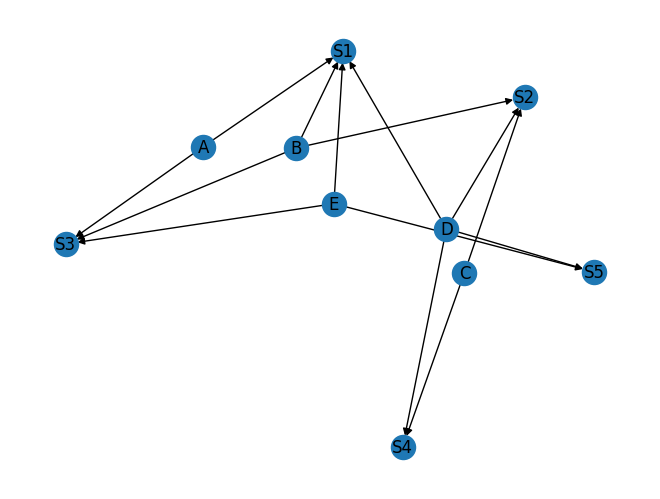

In [12]:
nx.draw(G, with_labels=True , pos=pos)

In [53]:
import networkx as nx

def create_Grp(bipartite_graph):
    G = nx.Graph(bipartite_graph)
    Grp = []
    skills = [node for node in G.nodes() if node in G.nodes() if G.nodes[node]['bipartite'] == 0]
    for skill in skills:
        supporters = [n for n in G.neighbors(skill)]
        groups = list(nx.connected_components(G.subgraph(supporters)))
        Grp.extend(groups)
    return Grp



In [54]:
import matplotlib.pyplot as plt

def display_Grp(bipartite_graph, Grp):
    G = nx.Graph(bipartite_graph)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    for i, group in enumerate(Grp):
        subgraph = G.subgraph(group)
        nx.draw_networkx_nodes(subgraph, pos, node_color='g')
        nx.draw_networkx_edges(subgraph, pos, edge_color='y')
        group_label = "Group {}".format(i+1)
        plt.text(0.5,0.5, group_label, fontsize=5, transform=plt.gca().transAxes)
    plt.show()



In [55]:
import networkx as nx

def create_bipartite_graph():
    G = nx.Graph()

    # create nodes for skills
    skills = ["Python", "Java", "C++", "Javascript", "SQL"]
    for skill in skills:
        G.add_node(skill, bipartite=0)

    # create nodes for experts
    experts = ["Alice", "Bob", "Charlie", "David", "Eve", "Frank"]
    for expert in experts:
        G.add_node(expert, bipartite=1)

    G.add_edges_from([
        ("Python", "Eve"),
        ("Python", "Bob"),
        ("Python", "Charlie"), 
        ("Java", "Bob"),
        ("Java", "Frank"),             
        ("C++", "Alice"), 
        ("C++", "David"), 
        ("C++", "Eve"), 
        ("Java", "Charlie"),
        ("Javascript", "David"), 
        ("Javascript", "Eve"), 
        ("Javascript", "Frank"), 
        ("SQL", "Eve"), 
        ("SQL", "Frank")])
    return G


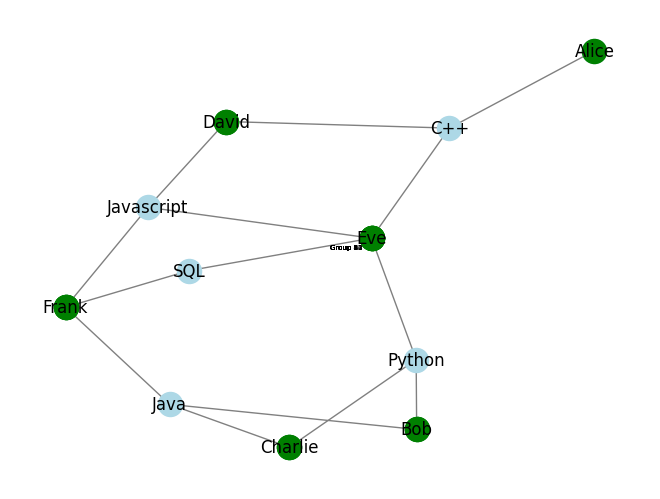

In [56]:
G = create_bipartite_graph()
Grp = create_Grp(G)
display_Grp(G, Grp)

In [48]:
Grp

[{'Charlie'},
 {'Bob'},
 {'Eve'},
 {'Charlie'},
 {'Bob'},
 {'Frank'},
 {'David'},
 {'Alice'},
 {'Eve'},
 {'David'},
 {'Frank'},
 {'Eve'},
 {'Frank'},
 {'Eve'}]

In [57]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.sparse.linalg import svds

def cluster_expert_skill(adj_matrix, n_clusters):
    # Step 1: Form matrix D1 and D2 and also matrix Mn
    d1 = np.sum(adj_matrix, axis=1)
    d2 = np.sum(adj_matrix, axis=0)
    D1 = np.diag(d1)
    D2 = np.diag(d2)
    Mn = D1 - adj_matrix
    # Step 2: Compute the singular vectors of Mn
    U, s, Vh = svds(Mn, k=n_clusters)
    U = U[:, ::-1]
    s = s[::-1]
    Vh = Vh[::-1]
    # Step 3: Form the matrix o
    o = np.dot(U, np.diag(np.sqrt(s)))
    # Step 4: Run the k-means algorithm on the o-dimensional data
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(o)
    return kmeans.labels_


In [58]:
import networkx as nx
import matplotlib.pyplot as plt

def display_clusters(adj_matrix, labels):
    # Create a bipartite graph from the adjacency matrix
    G = nx.Graph()
    num_experts = adj_matrix.shape[0]
    for i in range(num_experts):
        G.add_node(i, bipartite=0)
    for j in range(num_experts, num_experts+adj_matrix.shape[1]):
        G.add_node(j, bipartite=1)
    for i in range(num_experts):
        for j in range(num_experts, num_experts+adj_matrix.shape[1]):
            if adj_matrix[i, j-num_experts] == 1:
                G.add_edge(i, j)
    # Create a color map for the clusters
    color_map = {}
    for i in range(num_experts):
        color_map[i] = labels[i]
    # Draw the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_color=[color_map[i] for i in G], with_labels=True)
    plt.show()
